In [28]:
import numpy as np
import os
import math
#import cv2
from pylab import plt
import scipy.stats as sts

In [29]:
a = os.listdir(".")
def csv_gen(path):
    return ( i for i in np.genfromtxt(path, delimiter=','))

def fname_iter(directory):
    return (d for d in os.listdir(directory))
def img_iter(directory):
    im_exts = ['png','jpg','jpeg' ]
    for path in fname_iter(directory):
        if path.split('.')[-1] in im_exts:
            im = cv2.imread(path,mode='RGB')
            yield im

data_path = [
    './data/ML_interfere_eval/seq/data_20-03-2019_18-59_portD1.csv'
    ,'./data/ML_interfere_eval/seq/data_20-03-2019_18-59_portD2.csv'
]

In [30]:
def read_csv_data(filepath):
    d = np.genfromtxt(filepath,delimiter=',')
    return d

data = [
    read_csv_data(p) for p in data_path
]

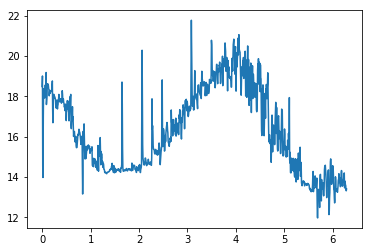

In [31]:
plt.plot(X_1, Y_1)

In [32]:
X_1 = np.array([data[0][i][1] for i in range(len(data[0]))])[600:]
X_2 = np.array([data[1][i][1] for i in range(len(data[1]))])[600:]

In [33]:
Y_1 = np.array([data[0][i][0] for i in range(len(data[0]))])[600:]
Y_2 = np.array([data[1][i][0] for i in range(len(data[1]))])[600:]

In [34]:
X_1 = (X_1 - X_1[0])/(X_1[len(X_1)-1]-X_1[0])*2*3.1415
X_2 = (X_2 - X_2[0])/(X_2[len(X_2)-1]-X_2[0])*2*3.1415

In [35]:
def get_koef(phi, h, X, Y):
    sigma = 0
    mu = 0
    n = 0
    mu = Y[abs(X-phi)<h].mean()
    sigma = Y[abs(X-phi)<h].std()
    return mu, sigma

In [36]:
def learning_proces(X_1, Y_1, X_2, Y_2, h):
    phis = np.linspace(0, 2*3.1415, math.floor(3.1415/h))
    mu_1 = np.zeros(len(phis))
    sigma_1 = np.zeros(len(phis))
    mu_2 = np.zeros(len(phis))
    sigma_2 = np.zeros(len(phis))
    for i in range(len(phis)):
        mu_1[i] , sigma_1[i] = get_koef(phis[i], h, X_1, Y_1)
        mu_2[i], sigma_2[i] = get_koef(phis[i], h, X_2, Y_2)
    return phis, mu_1, mu_2, sigma_1, sigma_2

In [37]:
def count_metrics(mu_1, sigma_1,mu_2, sigma_2, Y):
    r = 0
    for y in Y:
        r -= float((y[0]-mu_1)**2/2/sigma_1**2)
        r -= float((y[1]-mu_2)**2/2/sigma_2**2)
    return float(r)

In [38]:
def make_prediction(Y, phis, mu_1, mu_2, sigma_1, sigma_2):
    ans = 0
    prob = count_metrics(mu_1[0], sigma_1[0],mu_2[0], sigma_2[0], Y)
    for i in range( len(mu_1)):
        a = count_metrics(mu_1[i], sigma_1[i],mu_2[i], sigma_2[i], Y)
        if a > prob:
            ans = phis[i]
            prob = a
    probability = np.zeros(len(phis))
    for i in range(len(phis)):
        probability[i] = count_metrics(mu_1[i], sigma_1[i],mu_2[i], sigma_2[i], Y)
    return ans, prob/len(Y), probability

In [39]:
%%time
phis, mu_1, mu_2, sigma_1, sigma_2 = learning_proces(np.array(X_1), np.array(Y_1), np.array(X_2), np.array(Y_2), 0.2)

CPU times: user 5.22 ms, sys: 2.55 ms, total: 7.77 ms
Wall time: 5.65 ms


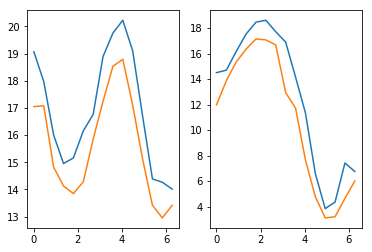

In [40]:

plt.subplot(1,2,1)
plt.plot(phis, np.array(mu_1)+np.array(sigma_1))
plt.plot(phis, np.array(mu_1)-np.array(sigma_1))

plt.subplot(1,2,2)

plt.plot(phis, np.array(mu_2)+np.array(sigma_2))
plt.plot(phis, np.array(mu_2)-np.array(sigma_2))

In [41]:
def make_test(n, x, model, sigma, model_1):
    return [[float(sts.norm(model(x), sigma).rvs(1)),float(sts.norm(model_1(x), sigma).rvs(1))]  for i in range(10)]






phi_test = np.linspace(0, 2*3.1415, 100)
answers = np.zeros(len(phi_test))
for i in range(len(phi_test)):
    answers[i], proba, probability = make_prediction(, phis, mu_1, mu_2, sigma_1, sigma_2)
plt.plot(phi_test, answers)  

SyntaxError: invalid syntax (<ipython-input-41-089f68866368>, line 12)

In [42]:
sts.norm(13,1).rvs((10))

array([12.95287984, 12.14398625, 11.51216872, 13.33783593, 13.26685747,
       13.42936534, 12.04791567, 13.25018736, 12.29253638, 13.37809556])

In [43]:
Y = np.zeros((10,2))

In [44]:
for i in range(10):
    Y[i][0] = sts.norm(19.5,1).rvs(1)
    Y[i][1] = sts.norm(8,1).rvs(1)

In [45]:
Y

array([[19.57542874,  8.70870723],
       [19.97711495,  8.65374771],
       [19.50718231,  9.45941089],
       [18.96767589,  7.65224892],
       [18.24562581,  8.60415196],
       [20.11778371,  7.25262192],
       [19.86979531,  8.63130628],
       [19.44315713,  8.76619114],
       [19.73618228,  9.31999897],
       [18.20597686,  8.15849664]])

In [46]:
ans, proba, probability = make_prediction(Y, phis, mu_1, mu_2, sigma_1, sigma_2)

In [47]:
ans

4.039071428571429

In [48]:
proba

-0.625852913105919

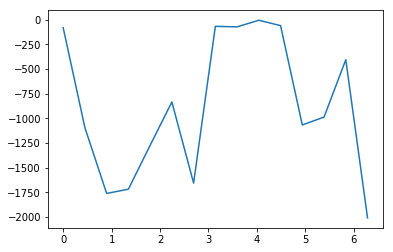

In [49]:
plt.plot(phis, probability)

In [50]:
sigma_1.mean()

0.6591411520662281

In [1]:

from gauss_est import gauss_est

In [25]:
X = [np.array(X_1), np.array(X_2)]
Y = [np.array(Y_1), np.array(Y_2)]

In [26]:
estimator = gauss_est(0.1)

NameError: name 'gauss_est' is not defined

In [27]:
estimator.fit(X, Y)

NameError: name 'estimator' is not defined

In [28]:
Y = []
Y.append(sts.norm(19.5,1).rvs(10))
Y.append(sts.norm(8,1).rvs(10))

In [29]:
ans, proba = estimator.predict(Y)

2


In [1]:
ans

NameError: name 'ans' is not defined

In [31]:
proba


-14.854675186839566

In [5]:
print(gauss_est.__init__.__doc__)

Этот модуль позволяет находить фазу по значениям интенсивности.
     
     Данные должны буть представлены в следующем виде: X и Y это списки, длинны равной количеству каналов. Например, если у нас три канала, то X = [X_1, X_2, X_3] и Y = [Y_1, Y_2, Y_3]. 
     X_i и Y_i это набор данных на i-ом канале, тип этих массивов numpy. X_i[j] - это j-ая серия измерений на i-ом канале. 
     
     В predict данные посылаются следующим образом: Y - список измерений на каждом канале. Например, Y = [Y_1, Y_2, Y_3]. Y_i - это масиив типа numpy с измерениями амплитуды в канале. Возвращает функция три значения ans, proba, probability. ans - предсказанное значение фазы, proba - логарифм вероятности этого результата, probabilyty - массив numpy значений логартфма вероятности того, что измерено phis[i].
     
     


In [ ]:
Y = [
    np.array([
        [1,2,3],
        [4,5,6,2]
    ]),
    [
    ]
]